## 패키지

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## matplotlib 사용시 한국어 나오게 하는 코드
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


## 데이터 로드 및 전처리
[사용된 데이터 목록]
* `food`: 음식물쓰레기 FOOD_WASTE.CSV
* `korean`: 내국인유동인구 KOREAN.CSV
* `long_frgn`: 장기체류외국인유동인구 LONG_TERM_FRGM.CSV  
* `pop` : 거주인구_RESIDENT_POP.CSV  
* `card` : 음식관련 카드소비_CARD_SPENDING.CSV

In [3]:
# food = pd.read_csv('/content/drive/MyDrive/Data/빅콘/01_음식물쓰레기_FOOD_WASTE_210811_update.CSV',encoding='cp949')
# korean = pd.read_csv('/content/drive/MyDrive/Data/빅콘/02-1_내국인유동인구_KOREAN.CSV',encoding='cp949')
# long_frgn = pd.read_csv('/content/drive/MyDrive/Data/빅콘/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV',encoding='cp949')
# pop = pd.read_csv('/content/drive/MyDrive/Data/빅콘/03_거주인구_RESIDENT_POP.CSV',encoding='cp949')
# card = pd.read_csv('/content/drive/MyDrive/Data/빅콘/04_음식관련 카드소비_CARD_SPENDING.CSV',encoding='cp949')

#### 1) 음식물쓰레기

In [4]:
food = pd.read_csv('/content/drive/MyDrive/Data/빅콘/01_음식물쓰레기_FOOD_WASTE_210811_update.CSV',encoding='cp949')
# 컬럼명 변환
food.columns = ['날짜','시','행정동코드','행정동','배출거점지역코드','배출건수','배출량','배출금액']
food.head(3)

,날짜,시,행정동코드,행정동,배출거점지역코드,배출건수,배출량,배출금액
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758


In [5]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211445 entries, 0 to 2211444
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   날짜        object
 1   시         object
 2   행정동코드     object
 3   행정동       object
 4   배출거점지역코드  object
 5   배출건수      int64 
 6   배출량       int64 
 7   배출금액      int64 
dtypes: int64(3), object(5)
memory usage: 135.0+ MB


###### 결측치 확인

* 결측치 없음

In [6]:
food.isnull().sum().to_frame()

,0
날짜,0
시,0
행정동코드,0
행정동,0
배출거점지역코드,0
배출건수,0
배출량,0
배출금액,0


###### '날짜'컬럼은 날짜형태로 변환 후 '년도', '월' 추출

In [7]:
food['날짜'] = pd.to_datetime(food['날짜'])
food['년도'] = food.날짜.dt.year
food['월'] = food.날짜.dt.month

###### '시' 컬럼의 '알수없음' 제거

In [8]:
nan_name = food[food['시']=='알수없음'].index
food.drop(nan_name, inplace=True)

food.head()

,날짜,시,행정동코드,행정동,배출거점지역코드,배출건수,배출량,배출금액,년도,월
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464,2018,1
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787,2018,1
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758,2018,1
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898,2018,1
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317,2018,1


#### 2) 내국인 / 장기체류외국인 / 단기체류 외국인 유동인구

In [9]:
korean = pd.read_csv('/content/drive/MyDrive/Data/빅콘/02-1_내국인유동인구_KOREAN.CSV',encoding='cp949')
korean.columns = ['날짜','시간','시','행정동코드','행정동명','성별','연령대','거주인구','근무인구','방문인구','거주지역행정구역']
korean.head(3)

,날짜,시간,시,행정동코드,행정동명,성별,연령대,거주인구,근무인구,방문인구,거주지역행정구역
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주


In [10]:
long_frgn = pd.read_csv('/content/drive/MyDrive/Data/빅콘/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV',encoding='cp949')
long_frgn.columns = ['날짜','시간','외국인국적코드','시','행정동코드','행정동명','거주인구','근무인구','방문인구','거주지역행정구역']
long_frgn.head(3)

,날짜,시간,외국인국적코드,시,행정동코드,행정동명,거주인구,근무인구,방문인구,거주지역행정구역
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외


In [11]:
short_frgn = pd.read_csv('/content/drive/MyDrive/Data/빅콘/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV',encoding='cp949')
short_frgn.columns = ['날짜','시간','외국인국적코드','시','행정동코드','행정동명','방문인구']
short_frgn.head(3)

,날짜,시간,외국인국적코드,시,행정동코드,행정동명,방문인구
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771


###### 결측치 확인
* 결측치 없음

In [12]:
korean.isnull().sum().to_frame()

,0
날짜,0
시간,0
시,0
행정동코드,0
행정동명,0
성별,0
연령대,0
거주인구,0
근무인구,0
방문인구,0


In [13]:
long_frgn.isnull().sum().to_frame()

,0
날짜,0
시간,0
외국인국적코드,0
시,0
행정동코드,0
행정동명,0
거주인구,0
근무인구,0
방문인구,0
거주지역행정구역,0


In [14]:
short_frgn.isnull().sum().to_frame()

,0
날짜,0
시간,0
외국인국적코드,0
시,0
행정동코드,0
행정동명,0
방문인구,0


###### '총인구' 컬럼 추가
* 내국인 / 장기체류외국인: 거주인구 + 근무인구 + 방문인구
* 단기체류외국인: 방문인구만 있음.


In [15]:
cols = ['거주인구','근무인구','방문인구']
korean['총인구'] = korean.loc[:, cols].sum(axis=1)
long_frgn['총인구'] = long_frgn.loc[:, cols].sum(axis=1)

###### 시간대 라벨링
* 새벽: 1 ~ 5시  
* 아침: 6 ~ 9시  
* 낮:   10 ~ 17시  
* 저녁: 18 ~ 21시  
* 밤:   22 ~ 24시

In [16]:
def time_labeling(x):
    if 1 <= x <= 5:
        return '새벽'
    elif 6 <= x <= 9:
        return '아침'
    elif 10 <= x <= 17:
        return '낮'
    elif 18 <= x <= 21:
        return '저녁'
    elif 22 <= x <= 24:
        return '밤'
korean['시간대'] = korean['시간'].apply(time_labeling)
long_frgn['시간대'] = long_frgn['시간'].apply(time_labeling)
short_frgn['시간대'] = short_frgn['시간'].apply(time_labeling)

###### 연령대 라벨링
* 0: 10세 미만
* 1: 10대
* 2: 20대
* 3: 30대
* 4: 40대
* 5: 50대
* 6: 60대
* 7: 70대
* 8: 80세 이상

In [17]:
temp_list= {0:0, 10:1, 20:2, 30:3, 40:4, 50:5, 60:6, 70:7, 80:8}

In [18]:
korean.head()
korean.insert(4, '나이', korean.연령대.map(temp_list))

###### 성별 라벨링
* 0: 남성
* 1: 여성

In [19]:
semp_list= {'남자':0, '여자':1}
korean.insert(5, '성', korean.성별.map(semp_list))
korean = korean.drop(columns=['성별'])

#### 3) 거주인구

In [20]:
pop = pd.read_csv('/content/drive/MyDrive/Data/빅콘/03_거주인구_RESIDENT_POP.CSV',encoding='cp949')

In [21]:
# 년,월,동별 거주인구,외국인인구,총인구 피벗
pop2 = pd.pivot_table(data=pop,index=['base_year','base_month','emd_nm'],values=['resid_reg_pop','foreign_pop','total_pop'],aggfunc=sum).reset_index()

#### 4) 카드데이터

In [22]:
card = pd.read_csv('/content/drive/MyDrive/Data/빅콘/04_음식관련 카드소비_CARD_SPENDING.CSV',encoding='cp949')

In [23]:
card['base_date'] = pd.to_datetime(card.base_date)
card['월'] = card['base_date'].dt.month
card['년도'] = card['base_date'].dt.year
card['index'] = card['년도'].map(str)+"-"+card['월'].map(str)+"-"+card['emd_nm']

cards = pd.pivot_table(data = card, index=['index'],columns='mct_cat_nm',values='use_amt',aggfunc=sum).reset_index()

#### 5) 알 수 없음

In [24]:
unknown = food[food.시 == '알수없음']
unknown = pd.pivot_table(data = unknown, index = ['년도','월'],values='배출량').reset_index()

## EDA

#### 1) 시간대별 총 유동인구 살펴보기

In [25]:
korean.head(3)

,날짜,시간,시,행정동코드,나이,성,행정동명,연령대,거주인구,근무인구,방문인구,거주지역행정구역,총인구,시간대
0,2018-01-01,1,제주시,50110250,0,NaN,한림읍,0,638.5509,15.5400,151.5149,제주,805.6058,새벽
1,2018-01-01,1,제주시,50110250,0,NaN,한림읍,0,0.0000,3.7249,171.3458,그외,175.0707,새벽
2,2018-01-01,1,제주시,50110250,1,NaN,한림읍,10,668.4577,17.0308,166.0500,제주,851.5385,새벽


###### 시, 행정동, 시간대에 따른 평균 유동인구
* 행정동명, 유동인구 높은순으로 정렬


In [26]:
# 내국인 평균 유동인구수
pop_sdt_k = korean.groupby(['시','행정동명','시간대'])['총인구'].agg(**{'내국인평균유동인구':'mean'}).reset_index()
pop_sdt_k = pop_sdt_k.sort_values(by=['행정동명','내국인평균유동인구'], ascending=[True, False])
pop_sdt_k.head()

,시,행정동명,시간대,내국인평균유동인구
88,제주시,건입동,아침,391.057578
87,제주시,건입동,새벽,373.912720
85,제주시,건입동,낮,368.964445
86,제주시,건입동,밤,364.346214
89,제주시,건입동,저녁,361.372793


In [27]:
# 장기체류외국인 평균 유동인구수
pop_sdt_lf = long_frgn.groupby(['시','행정동명','시간대'])['총인구'].agg(**{'장기체류외국인평균유동인구':'mean'}).reset_index()
pop_sdt_lf = pop_sdt_lf.sort_values(by=['행정동명','장기체류외국인평균유동인구'], ascending=[True, False])
pop_sdt_lf = pop_sdt_lf.sort_values(by='장기체류외국인평균유동인구', ascending=False)

In [28]:
# 단기체류외국인 평균 유동인구수
pop_sdt_sf = short_frgn.groupby(['시','행정동명','시간대'])['방문인구'].agg(**{'단기체류외국인평균유동인구':'mean'}).reset_index()
pop_sdt_sf = pop_sdt_sf.sort_values(by=['행정동명','단기체류외국인평균유동인구'], ascending=[True, False])
pop_sdt_sf = pop_sdt_sf.sort_values(by='단기체류외국인평균유동인구', ascending=False)

###### 각 동에서 유동인구가 가장 많은 시간대 카운트해서 데이터프레임 생성

In [29]:
# 내국인
t0,t1,t2,t3,t4 = 0,0,0,0,0

i = 0
while i <= len(pop_sdt_k)-5:
  time = pop_sdt_k.iloc[i,:]['시간대']
  if time=='새벽': t0 += 1
  elif time=='아침': t1 += 1
  elif time=='낮': t2 += 1
  elif time=='저녁': t3 += 1
  elif time=='밤': t4 += 1
  
  i += 5

df = pd.DataFrame(data=[t0,t1,t2,t3,t4], index=time_order, columns=['count_k'])
df

NameError: ignored

In [ ]:
# 장기체류 외국인
lf0,lf1,lf2,lf3,lf4 = 0,0,0,0,0

i = 0
while i <= len(pop_sdt_lf)-5:
  time = pop_sdt_lf.iloc[i,:]['시간대']
  if time=='새벽': lf0 += 1
  elif time=='아침': lf1 += 1
  elif time=='낮': lf2 += 1
  elif time=='저녁': lf3 += 1
  elif time=='밤': lf4 += 1
  
  i += 5

df['count_lf'] = [lf0,lf1,lf2,lf3,lf4]
df

In [ ]:
# 단기체류 외국인
sf0,sf1,sf2,sf3,sf4 = 0,0,0,0,0

i = 0
while i <= len(pop_sdt_sf)-5:
  time = pop_sdt_sf.iloc[i,:]['시간대']
  if time=='새벽': sf0 += 1
  elif time=='아침': sf1 += 1
  elif time=='낮': sf2 += 1
  elif time=='저녁': sf3 += 1
  elif time=='밤': sf4 += 1
  
  i += 5

df['count_sf'] = [sf0,sf1,sf2,sf3,sf4]
df.head()

In [ ]:
df.rename(columns={'count':'내국인', 'count_lf':'장기외국인', 'count_sf':'단기외국인'}, inplace=True)
df

In [ ]:
# 시간대별 유동인구 그래프
x = np.arange(len(time_order))
plt.figure(figsize=(15,8))

plt.bar(x-0.2, df['내국인'], label='내국인', width=0.2, color='orange')
plt.bar(x, df['장기외국인'], label='장기외국인', width=0.2, color='pink')
plt.bar(x+0.2, df['단기외국인'], label='단기외국인', width=0.2, color='skyblue')
plt.xticks(x, time_order)
plt.legend()
plt.xlabel('시간대')
plt.ylabel('총유동인구')
plt.title('시간대별 총 유동인구', fontsize=15)
plt.ylim(0, 30)
plt.show()

* 내국인 -> 낮 > 저녁 
  : 내국인은 낮에 활동을 많이 함을 확인할 수 있다.
* 장기외국인 -> 새벽 > 낮  
  : 장기체류하는 외국인은 새벽에 많이 활동?
* 단기외국인(방문인구) -> 새벽 > 낮

#### 5) 알 수 없음

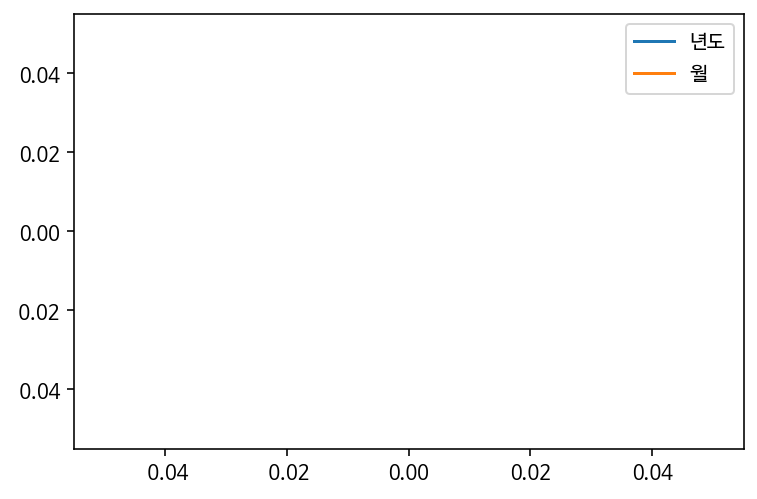

In [91]:
unknown.plot()

#### 6) 도시 쓰레기량 비교: 평균 누적 모두 사용

1. n개년 평균으로 보기

    → 월별로 보았을 때 7, 8월이 가장 배출량이 많음

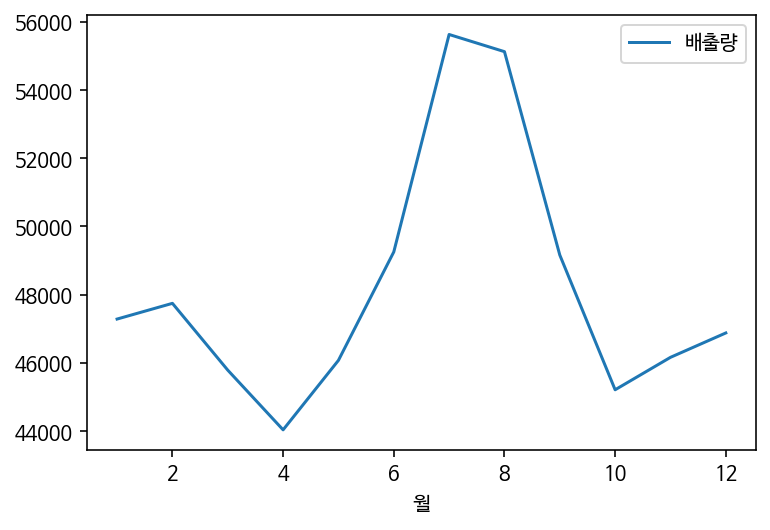

In [31]:
pd.pivot_table(data = food, index = '월', values = '배출량', aggfunc='mean').plot()

2. n개년 누적으로 보기

    → 노형동, 이도2동, 연동(신제주)

    → 6월 5월 1월이 가장 배출량이 많음

In [92]:
food_w.colums

NameError: ignored

In [32]:
#동별 누적 배출량 소트
pd.pivot_table(data = food_w, index = ['행정동'],values='배출량',aggfunc='sum').sort_values('배출량',ascending=False)[:5] 

NameError: ignored

- 월별로 보기

In [33]:
pd.pivot_table(data = food, index = '월', values = '배출량', aggfunc='sum').sort_values('배출량',ascending=False)[:5]

,배출량
월,
6,10320966374
5,10091062468
1,10082427518
3,9826534213
2,9345960752


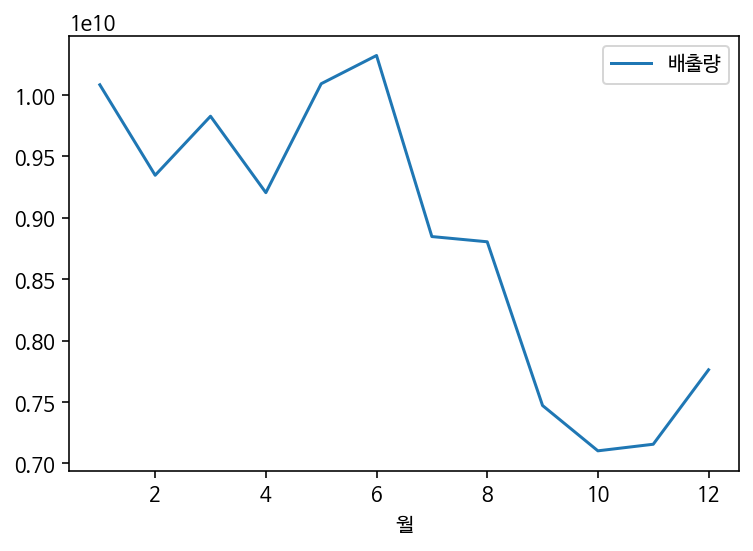

In [34]:
pd.pivot_table(data = food, index = '월', values = '배출량', aggfunc='sum').plot()

#### 7) 총거주인구&내국인거주&외국인거주 탐색
- **음식물쓰레기 4개년 총합으로 보았을때 5위 소팅 되는 행정동과 총거주인구와 내국인 거주인구 5위 소팅 되는 행정동과 일치한다.**
- 제주도민 피셜: **노형동이 신도시, 연동에 제주도청이 있고 이도2동에 시청 법원** 이런거 있어서 각각 구제주/신제주에서 가장...시내쪽중 하나가 아닐까.
- 원래는 중앙로쪽에 해서 대충 이도2동부터해서 1동이랑 아님 도남? 이쯤이 사람 되게 많았음 일도동도 좀 있었으려나...
- 보통 구제주(이도동이랑 중앙로 그쪽)/신제(연동 노형이쪽동네)주로 나눠서 얘기하는느낌인데 구제주는 오래된 동네다 느낌이 좀더 나는곳도 많고 그런느낌?

In [37]:
# 총거주인구
pd.pivot_table(data = pop, index = ['emd_nm'],values='total_pop',aggfunc='mean').sort_values('total_pop',ascending=False)[:5]

,total_pop
emd_nm,
노형동,28180.845238
이도2동,25258.190476
연동,21774.928571
애월읍,18521.845238
아라동,17859.880952


In [40]:
# 내국인거주
pd.pivot_table(data = pop, index = ['emd_nm'],values='resid_reg_pop',aggfunc='mean').sort_values('resid_reg_pop',ascending=False)[:5]

,resid_reg_pop
emd_nm,
노형동,27087.523810
이도2동,24937.047619
연동,20792.500000
애월읍,17998.928571
아라동,17292.345238


In [41]:
#외국인거주
pd.pivot_table(data = pop, index = ['emd_nm'],values='foreign_pop',aggfunc='mean').sort_values('foreign_pop',ascending=False)[:5]

,foreign_pop
emd_nm,
한림읍,1788.083333
노형동,1093.321429
연동,982.428571
성산읍,845.761905
대정읍,842.464286


- 상관관계결과
  - 배출량과 배출금액은 상관관계 1이다
  - 배출량과 배출건수와도 밀접한 상관관계
  - 총인구와 내국인거주와도 밀접한 상관관계

In [45]:
# food 피벗
fw_dong = pd.pivot_table(data = food, index = ['년도', '월', '행정동'],values='배출량',aggfunc='sum').reset_index()
fw_dong.head()

,년도,월,행정동,배출량
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550


In [46]:
fm_dong = pd.pivot_table(data = food, index = ['년도', '월', '행정동'],values='배출금액',aggfunc='sum').reset_index()
fm_dong.head()

,년도,월,행정동,배출금액
0,2018,1,건입동,1364804
1,2018,1,남원읍,1270773
2,2018,1,노형동,7883340
3,2018,1,대륜동,1676850
4,2018,1,대정읍,1164122


In [47]:
fg_dong = pd.pivot_table(data = food, index = ['년도', '월', '행정동'],values='배출건수',aggfunc='sum').reset_index()
fg_dong.head()

,년도,월,행정동,배출건수
0,2018,1,건입동,18416
1,2018,1,남원읍,9570
2,2018,1,노형동,113990
3,2018,1,대륜동,21666
4,2018,1,대정읍,10185


In [48]:
food_w2 = pd.pivot_table(data = food, index = ['년도', '월', '행정동'],values=['배출량','배출금액','배출건수'],aggfunc='sum').reset_index()
food_w2.head()

,년도,월,행정동,배출건수,배출금액,배출량
0,2018,1,건입동,18416,1364804,45646550
1,2018,1,남원읍,9570,1270773,42437700
2,2018,1,노형동,113990,7883340,265018400
3,2018,1,대륜동,21666,1676850,57612600
4,2018,1,대정읍,10185,1164122,38885550


In [50]:
pop.columns

Index(['base_year', 'base_month', 'city', 'emd_cd', 'emd_nm', 'sex',
       'resid_reg_pop', 'foreign_pop', 'total_pop'],
      dtype='object')

In [51]:
# pop 피벗
r_pop2 = pd.pivot_table(data=pop,index=['base_year', 'base_month', 'emd_nm'],values=['resid_reg_pop','foreign_pop','total_pop'],aggfunc=sum).reset_index()
r_pop2.head()

,base_year,base_month,emd_nm,foreign_pop,resid_reg_pop,total_pop
0,2018,1,건입동,228,9800,10028
1,2018,1,구좌읍,552,15574,16126
2,2018,1,남원읍,628,19112,19740
3,2018,1,노형동,1589,53369,54958
4,2018,1,대륜동,178,13473,13651


In [52]:
# 행정동 기준으로 합치기
merge_pop = pd.merge(r_pop2,food_w2)
merge_pop.head(10)

MergeError: ignored

In [ ]:
merge_pop.columns = ['년도','월','행정동','내국인거주','외국인인구','총거주인구','배출건수','배출금액','배출량']

corr_df = merge_pop.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

#### 8) 음식관련 카드소비 데이터 탐색: 데이터 탐색수 상관관계

In [53]:
card.columns = ['행정동','업종명','결제건수','결제금액','년','월','일']

ValueError: ignored

In [54]:
card_s1 = pd.pivot_table(data=card,index=['년', '월', '행정동','업종명'],values=['결제건수','결제금액'],aggfunc=sum).reset_index()
card_s1.head()

KeyError: ignored

- 행정동별 결제건수, 결제금액

In [ ]:
card_s2 = pd.pivot_table(data=card,index=['년', '월', '행정동'],values=['결제건수','결제금액'],aggfunc=sum).reset_index()
card_s2.head()

- 행정동별 결제건수&결제금액 소트

In [ ]:
pd.pivot_table(data=card,index=['행정동'],values=['결제건수'],aggfunc='sum').sort_values('결제건수',ascending=False)[:5]

In [ ]:
pd.pivot_table(data=card,index=['행정동'],values=['결제금액'],aggfunc='sum').sort_values('결제금액',ascending=False)[:5]

In [ ]:
pd.pivot_table(data=card,index=['년', '월', '행정동'],values=['결제금액'],aggfunc='sum').sort_values('결제금액',ascending=False)[:5] #쓰레기 배출량이 많은 8,9월

- 평균으로 보면?

In [ ]:
card_s2_m = pd.pivot_table(data=card,index=['행정동'],values=['결제건수','결제금액'],aggfunc='mean').reset_index()
card_s2_m.sort_values('결제건수',ascending=False)[:5]

In [ ]:
#결제건수 소팅
card_s2_m = pd.pivot_table(data=card,index=['행정동'],values=['결제건수'],aggfunc='mean').reset_index()
card_s2_m.sort_values('결제건수',ascending=False)[:5]

In [ ]:
#결제금액
card_s2_m = pd.pivot_table(data=card,index=['행정동'],values=['결제금액'],aggfunc='mean').reset_index()
card_s2_m.sort_values('결제금액',ascending=False)[:5]

#### 9)총거주인구&내국인거주&외국인거주 + 카드결제건수&카드결제금액 + 쓰레기 연관관계
- 결제금액과 결제건수는 연관관계가 있다

In [ ]:
merge_pop2 = pd.merge(merge_pop,card_s2)
merge_pop2.head(10)

In [ ]:
merge_pop2.columns = ['년','월','행정동','내국인거주','외국인인구','총거주인구','배출건수','배출금액','배출량', '결제건수', '결제금액']

In [ ]:
corr_df = merge_pop2.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
#행정동, 업종별 결제건수
card_s3 = pd.pivot_table(data=card,index=['년', '월', '행정동'], columns='업종명', values='결제건수',aggfunc=sum).reset_index()
card_s3.head()

In [ ]:
merge_pop3 = pd.merge(merge_pop2,card_s3)
merge_pop3.head(5)


#### 10)총거주인구&내국인거주&외국인거주 + 카드결제건수 + 쓰레기 연관관계

In [ ]:
corr_df = merge_pop3.corr(method='pearson')

plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

11) 총거주인구&내국인거주&외국인거주 + 카드결제금액 + 쓰레기 연관관계

In [ ]:
#행정동, 업종별 결제금액
card_s4 = pd.pivot_table(data=card,index=['년', '월', '행정동'], columns='업종명', values='결제금액',aggfunc=sum).reset_index()
card_s4.head()

In [ ]:
merge_pop4 = pd.merge(merge_pop2,card_s4)
merge_pop4.head(5)

In [ ]:
corr_df = merge_pop4.corr(method='pearson')

plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

#### 12) 유동인구 분석
- 쓰레기dt + 거주인구dt + 유동인구0,1,2
- 평균으로 나온 중앙동과 관련성이 있다.
- type 0 : 내국인 1: 장기외국인 2: 단기외국인

- 쓰레기량과 거주인구&방문인구&근무인구의 상관관계

In [ ]:
n_move2 = pd.pivot_table(data=korean,index=['년', '월', '시간대', '행정동'],values=['거주인구','근무인구','방문인구'],aggfunc='mean').reset_index()
n_move2.head()

In [ ]:
merge_pop5 = pd.merge(food_w2, n_move2)

corr_df = merge_pop5.corr(method='pearson')

plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

- 행정동을 기점으로
- 날짜, 연령대, 성별, 거주지역 행정지역의
- 거주인구, 근무인구 , 방문인구 탐색
#### 13 행정동별 거주인구&근무인구&방문인구
- 거주인구

In [57]:
pd.pivot_table(data = korean, index = ['행정동'],values='거주인구',aggfunc='mean').sort_values('거주인구',ascending=False)[:5]

KeyError: ignored

In [58]:
pd.pivot_table(data = korean, index = ['년','행정동'],values='거주인구',aggfunc='mean').sort_values('거주인구',ascending=False)[:5]

KeyError: ignored

In [ ]:
n_move3 = pd.pivot_table(data=korean,index=['시간대', '행정동'],values=['거주인구','근무인구','방문인구'],aggfunc='mean').reset_index()
n_move3.sort_values('거주인구',ascending=False)[:10]

  - 이도2동, 노형동, 연동

In [ ]:
 # 노형동만 보기
nh_move = n_move3[n_move3.행정동 == '노형동']
pd.pivot_table(data = nh_move, index = ['시간대'], values = '거주인구', aggfunc='mean').plot()

In [ ]:
 # 이도2동만 보기
id_move = n_move3[n_move3.행정동 == '이도2동']
pd.pivot_table(data = id_move, index = ['시간대'], values = '거주인구', aggfunc='mean').plot()

In [ ]:
 # 연동만 보기
y_move = n_move3[n_move3.행정동 == '연동']
pd.pivot_table(data = y_move, index = ['시간대'], values = '거주인구', aggfunc='mean').plot()

#### 14) 연령대 비교

- 40, 50대와 10대가 거주하는 사람이 많은 곳일수록 쓰레기 배출량이 높다

In [ ]:
n_move4 = pd.pivot_table(data=korean,index=['나이', '행정동'],values=['거주인구','근무인구','방문인구'],aggfunc='mean').reset_index()
n_move4.sort_values('거주인구',ascending=False)[:10]

In [ ]:
 # 노형동만 보기
nh_move = n_move5[n_move5.행정동 == '노형동']
pd.pivot_table(data = nh_move, index = ['나이'], values = '거주인구', aggfunc='mean').plot()

In [ ]:
 # 이도2동만 보기
id_move = n_move5[n_move5.행정동 == '이도2동']
pd.pivot_table(data = id_move, index = ['나이'], values = '거주인구', aggfunc='mean').plot()

In [ ]:
 # 연동만 보기
y_move = n_move5[n_move5.행정동 == '연동']
pd.pivot_table(data = y_move, index = ['나이'], values = '거주인구', aggfunc='mean').plot()

## 변수선택
상관관계를 보기 위한 ym_dong 생성

In [59]:
ym_dong = pd.pivot_table(data = food, index = ['년도','월','행정동',],values='배출량',aggfunc='sum').reset_index()
ym_dong['index'] = ym_dong['년도'].map(str)+"-"+ym_dong['월'].map(str)+"-"+ym_dong['행정동']

del ym_dong['년도']
del ym_dong['월']
del ym_dong['행정동']

### 월 변수

Text(0.5, 1.0, '제주시 전체 월별 음식물 쓰레기 배출량')

<Figure size 1440x1440 with 0 Axes>

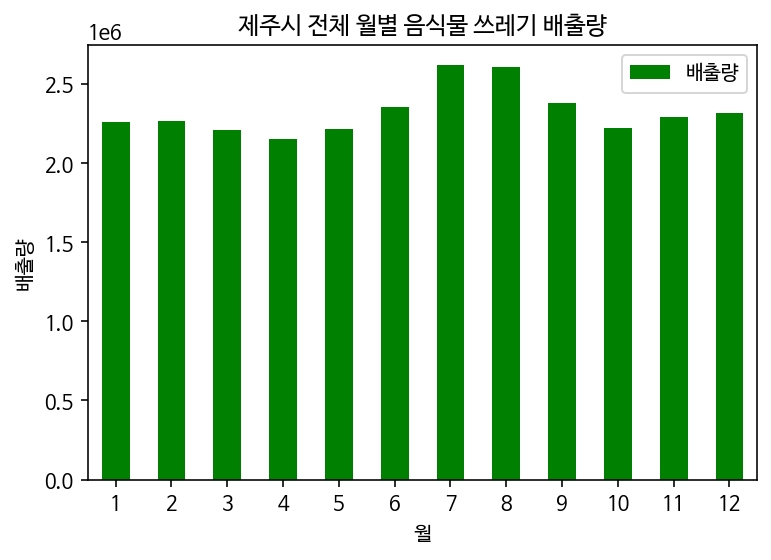

In [60]:
month_dong = pd.pivot_table(data = food, index = ['행정동','월'],values='배출량',aggfunc='mean').reset_index()

mm = pd.pivot_table(data = month_dong, index = '월', values = '배출량', aggfunc=sum)

plt.figure(figsize=(20,20))
mm.plot(kind='bar',color='green',rot=0)
plt.ylabel('배출량')
plt.title('제주시 전체 월별 음식물 쓰레기 배출량')

In [61]:
mm = mm.reset_index()
mm['계절'] = ['여름' if x in range(6,10) else '그외' for x in mm['월']]
mm

,월,배출량,계절
0,1,2.255020e+06,그외
1,2,2.264107e+06,그외
2,3,2.207242e+06,그외
3,4,2.148389e+06,그외
4,5,2.216127e+06,그외
5,6,2.355321e+06,여름
6,7,2.615271e+06,여름
7,8,2.606836e+06,여름
8,9,2.379961e+06,여름
9,10,2.219615e+06,그외


In [62]:
summer = mm[mm.계절 == '여름']['배출량']
not_summer = mm[mm.계절 != '여름']['배출량']

import scipy.stats
scipy.stats.ttest_ind(summer, not_summer,equal_var=False)

Ttest_indResult(statistic=3.4338341432986264, pvalue=0.033843403912884)

여름으로 설정한 6,7,8,9월의 평균 배출량이 그렇지 않은 월의 평균 배출량보다 유의미하게 차이남을 알 수 있다. 

### 주민등록인구 변수

In [63]:
# 음식물 쓰레기 배출량과 합치기 위한 인덱스 컬럼 생성
pop2['index'] = pop2['base_year'].map(str)+"-"+pop2['base_month'].map(str)+"-"+pop2['emd_nm']

# 음식물 쓰레기 배출량과 합치기 
merge_pop = pd.merge(pop2,ym_dong)
del merge_pop['emd_nm']
del merge_pop['base_year']
del merge_pop['base_month']

In [64]:
pop['외국인비율'] = (pop['foreign_pop']/pop['total_pop']) * 100
pop.describe()

,base_year,base_month,emd_cd,resid_reg_pop,foreign_pop,total_pop,외국인비율
count,3612.000000,3612.000000,3.612000e+03,3612.00000,3612.000000,3612.000000,3612.000000
mean,2019.285714,6.071429,5.011841e+07,7782.42691,280.084718,8062.511628,3.640361
std,1.030300,3.425820,9.764379e+03,6430.85599,366.921095,6638.318372,3.663199
min,2018.000000,1.000000,5.011025e+07,752.00000,10.000000,763.000000,0.464339
25%,2018.000000,3.000000,5.011054e+07,2538.00000,65.000000,2633.750000,1.523708
50%,2019.000000,6.000000,5.011065e+07,6292.50000,134.500000,6542.000000,2.615822
75%,2020.000000,9.000000,5.013052e+07,10941.25000,330.000000,11712.500000,4.329850
max,2021.000000,12.000000,5.013062e+07,28241.00000,2396.000000,29178.000000,25.803922


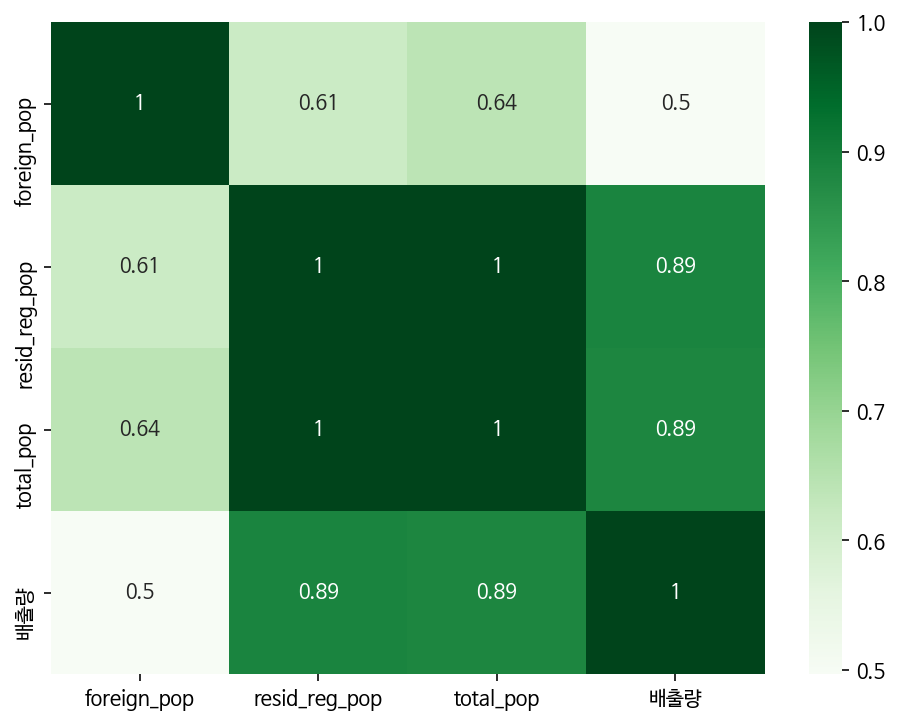

In [65]:
corr_df = merge_pop.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True,cmap='Greens')
plt.show()

외국인의 경우, 평균적으로 5%미만을 차지하고 있고 전체 혹은 내국인거주인구와 비교했을 때 상관관계가 떨어지므로 변수에서 제외한다.  
거주인구 혹은 총 인구는 배출량과 높은 상관관계를 가지고 있음을 볼 수 있다.  
-> 둘 중 어떤걸 사용할지는 우리 마음 

### 카드 변수

In [66]:
merge_card = pd.merge(cards,ym_dong)
merge_card[:3]

,index,간식,농축수산물,마트/슈퍼마켓,배달,부페,식품,아시아음식,양식,주점및주류판매,패스트푸드,한식,배출량
0,2018-1-건입동,52714107.0,180535251.0,6.134581e+08,11571838.0,5081850.0,2.792194e+08,69893850.0,37051483.0,14468297.0,55110922.0,7.055836e+08,45646550
1,2018-1-남원읍,36003854.0,132565191.0,7.007385e+08,5163749.0,836173.0,2.854035e+08,87237934.0,18314275.0,9074662.0,57030976.0,5.459299e+08,42437700
2,2018-1-노형동,398428801.0,521442784.0,4.918396e+09,86216063.0,15383521.0,1.100095e+09,478343394.0,230258664.0,114581724.0,402990583.0,4.035121e+09,265018400


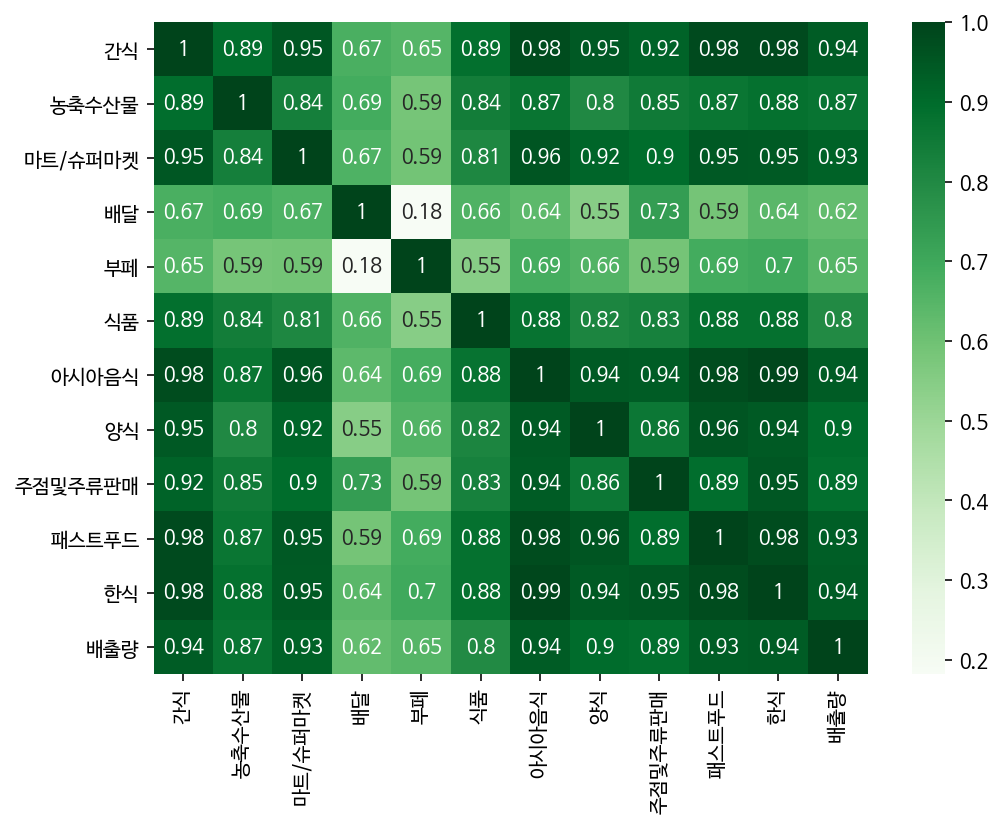

In [67]:
corr_df = merge_card.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True,cmap='Greens')
plt.show()

카드 소비의 경우 대부분이 높게 나온 편에 속하나,  
한식, 패스트푸드, 아시아음식, 간식, 양식, 마트/슈퍼마켓이 0.9이상의 상관관계를 보임을 알 수 있다. 

## 데이터셋 생성

In [79]:
df_pop = merge_pop[['index','배출량','total_pop']]
df_merge = merge_card[['index','한식', '패스트푸드', '아시아음식', '간식', '양식', '마트/슈퍼마켓']]
dataset = pd.merge(df_pop,df_merge)

dataset['년도'] = [ x.split('-')[0] for x in dataset['index']]
dataset['월'] = [ x.split('-')[1] for x in dataset['index']]
dataset['읍면동'] = [ x.split('-')[2] for x in dataset['index']]
del dataset['index']

dataset.head()

,배출량,total_pop,한식,패스트푸드,아시아음식,간식,양식,마트/슈퍼마켓,년도,월,읍면동
0,45646550,10028,7.055836e+08,55110922.0,69893850.0,52714107.0,37051483.0,6.134581e+08,2018,1,건입동
1,42437700,19740,5.459299e+08,57030976.0,87237934.0,36003854.0,18314275.0,7.007385e+08,2018,1,남원읍
2,265018400,54958,4.035121e+09,402990583.0,478343394.0,398428801.0,230258664.0,4.918396e+09,2018,1,노형동
3,57612600,13651,6.700034e+08,81574888.0,92484907.0,62481472.0,38325300.0,1.204811e+09,2018,1,대륜동
4,38885550,22603,7.621949e+08,98015164.0,96196033.0,88847534.0,117581563.0,1.360298e+09,2018,1,대정읍


#### 읍면동처리

In [80]:
encoded_읍면동 = pd.get_dummies(dataset['읍면동'],prefix="읍면동")
dataset = pd.concat((dataset,encoded_읍면동),axis=1)

dong_em_g = dataset.groupby('읍면동')['배출량'].agg('mean').sort_values(ascending = False)

for i, d in enumerate(list(dong_em_g.index)):
    dataset.loc[dataset['읍면동'] == d, '읍면동'] = i

dataset['읍면동'] = pd.to_numeric(dataset['읍면동'])
dataset.astype('float')

,배출량,total_pop,한식,패스트푸드,아시아음식,간식,양식,마트/슈퍼마켓,년도,월,읍면동,읍면동_건입동,읍면동_구좌읍,읍면동_남원읍,읍면동_노형동,읍면동_대륜동,읍면동_대정읍,읍면동_대천동,읍면동_도두동,읍면동_동홍동,읍면동_봉개동,읍면동_삼도1동,읍면동_삼도2동,읍면동_삼양동,읍면동_서홍동,읍면동_성산읍,읍면동_송산동,읍면동_아라동,읍면동_안덕면,읍면동_애월읍,읍면동_연동,읍면동_영천동,읍면동_예래동,읍면동_오라동,읍면동_외도동,읍면동_용담1동,읍면동_용담2동,읍면동_이도1동,읍면동_이도2동,읍면동_이호동,읍면동_일도1동,읍면동_일도2동,읍면동_정방동,읍면동_조천읍,읍면동_중문동,읍면동_중앙동,읍면동_천지동,읍면동_표선면,읍면동_한경면,읍면동_한림읍,읍면동_화북동,읍면동_효돈동
0,45646550.0,10028.0,7.055836e+08,55110922.0,69893850.0,52714107.0,37051483.0,6.134581e+08,2018.0,1.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42437700.0,19740.0,5.459299e+08,57030976.0,87237934.0,36003854.0,18314275.0,7.007385e+08,2018.0,1.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,265018400.0,54958.0,4.035121e+09,402990583.0,478343394.0,398428801.0,230258664.0,4.918396e+09,2018.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57612600.0,13651.0,6.700034e+08,81574888.0,92484907.0,62481472.0,38325300.0,1.204811e+09,2018.0,1.0,17.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,38885550.0,22603.0,7.621949e+08,98015164.0,96196033.0,88847534.0,117581563.0,1.360298e+09,2018.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,42453750.0,12681.0,3.694372e+08,35656312.0,54575350.0,22969352.0,15667947.0,5.403033e+08,2021.0,6.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1630,27060150.0,9495.0,2.672529e+08,26876799.0,48106115.0,23045501.0,14955649.0,3.763189e+08,2021.0,6.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1631,82746990.0,24462.0,8.988106e+08,81433739.0,105470802.0,74235134.0,40153504.0,7.934176e+08,2021.0,6.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1632,110750050.0,24630.0,1.411014e+09,125227233.0,141865970.0,129374585.0,48038685.0,1.392380e+09,2021.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 월처리

In [81]:
encoded_월 = pd.get_dummies(dataset['월'],prefix="월")
dataset = pd.concat((dataset,encoded_월),axis=1)
del dataset['월']

#### 배출량 로그화


In [82]:
dataset['log_em_g'] = np.log1p(dataset['배출량'])
real_price = dataset['배출량'] # 원래 가격
dataset.drop('배출량', axis=1, inplace=True)
del dataset['년도']
dataset.head(3)

,total_pop,한식,패스트푸드,아시아음식,간식,양식,마트/슈퍼마켓,읍면동,읍면동_건입동,읍면동_구좌읍,읍면동_남원읍,읍면동_노형동,읍면동_대륜동,읍면동_대정읍,읍면동_대천동,읍면동_도두동,읍면동_동홍동,읍면동_봉개동,읍면동_삼도1동,읍면동_삼도2동,읍면동_삼양동,읍면동_서홍동,읍면동_성산읍,읍면동_송산동,읍면동_아라동,읍면동_안덕면,읍면동_애월읍,읍면동_연동,읍면동_영천동,읍면동_예래동,읍면동_오라동,읍면동_외도동,읍면동_용담1동,읍면동_용담2동,읍면동_이도1동,읍면동_이도2동,읍면동_이호동,읍면동_일도1동,읍면동_일도2동,읍면동_정방동,읍면동_조천읍,읍면동_중문동,읍면동_중앙동,읍면동_천지동,읍면동_표선면,읍면동_한경면,읍면동_한림읍,읍면동_화북동,읍면동_효돈동,월_1,월_10,월_11,월_12,월_2,월_3,월_4,월_5,월_6,월_7,월_8,월_9,log_em_g
0,10028,7.055836e+08,55110922.0,69893850.0,52714107.0,37051483.0,6.134581e+08,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,17.636439
1,19740,5.459299e+08,57030976.0,87237934.0,36003854.0,18314275.0,7.007385e+08,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,17.563548
2,54958,4.035121e+09,402990583.0,478343394.0,398428801.0,230258664.0,4.918396e+09,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,19.395310


### train / test set split

In [83]:
from sklearn.model_selection import train_test_split

feature_columns = dataset.columns.difference(["log_em_g"]) # Target column 빼기

X = dataset[feature_columns]
y = dataset.log_em_g

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.75, test_size = 0.25, random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1225, 61) (409, 61) (1225,) (409,)


## 모델링

#### 모델관련 라이브러리 및 평가함수

In [84]:
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,  Ridge 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesRegressor

In [85]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

def rmse_cv(model):
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    for i, (train_index, test_index) in enumerate(tscv.split(train_x), start=0):
        X_train, X_test = train_x.iloc[train_index], train_x.iloc[test_index]
        y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
        clf = model.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse = RMSE(y_test, pred) 
        rmse_list.append(rmse)
    return type(model).__name__, rmse_list

def print_rmse_score(model):
    model_name, score = rmse_cv(model)
    for i, r in tqdm(enumerate(score, start=1), leave=True):
        if i == 1:
            print('\n')
            print(f'{i} FOLDS: {model_name} RMSLE: {r:.4f}')
        else:
            print(f'{i} FOLDS: {model_name} RMSLE: {r:.4f}')
    print(f'\n{model_name} mean RMSLE: {np.mean(score):.4f}')
    print('='*40)

#### 모델 생성

In [86]:
reg = LinearRegression()
ridge = Ridge(alpha=0.05, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Enet = ElasticNet(alpha=0.03,l1_ratio = 0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1)
et = ExtraTreesRegressor(n_estimators=100, random_state=1)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
                             max_depth=3, min_child_weight=1.7817, n_estimators=1000,
                             reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213,
                             silent=1, random_state=1, nthread=-1)
model_lgb = lgb.LGBMRegressor(learning_rate=0.05, n_estimators=720,random_state=1)

In [87]:
score = []
for model in [reg, ridge, lasso, Enet, DTree, rf, model_lgb, model_xgb, et]:
    print_rmse_score(model)

10it [00:00, 1582.70it/s]




1 FOLDS: LinearRegression RMSLE: 0.6306
2 FOLDS: LinearRegression RMSLE: 0.3590
3 FOLDS: LinearRegression RMSLE: 0.4117
4 FOLDS: LinearRegression RMSLE: 0.3898
5 FOLDS: LinearRegression RMSLE: 0.4002
6 FOLDS: LinearRegression RMSLE: 0.2905
7 FOLDS: LinearRegression RMSLE: 0.3411
8 FOLDS: LinearRegression RMSLE: 0.3114
9 FOLDS: LinearRegression RMSLE: 0.3405
10 FOLDS: LinearRegression RMSLE: 0.3370

LinearRegression mean RMSLE: 0.3812


0it [00:00, ?it/s]



1 FOLDS: Ridge RMSLE: 0.5937
2 FOLDS: Ridge RMSLE: 0.3532
3 FOLDS: Ridge RMSLE: 0.4154
4 FOLDS: Ridge RMSLE: 0.3894
5 FOLDS: Ridge RMSLE: 0.4039

10it [00:00, 2640.75it/s]



6 FOLDS: Ridge RMSLE: 0.2816
7 FOLDS: Ridge RMSLE: 0.3403
8 FOLDS: Ridge RMSLE: 0.3149
9 FOLDS: Ridge RMSLE: 0.3429
10 FOLDS: Ridge RMSLE: 0.3331

Ridge mean RMSLE: 0.3768


10it [00:00, 2585.09it/s]




1 FOLDS: Lasso RMSLE: 0.4057
2 FOLDS: Lasso RMSLE: 0.3334
3 FOLDS: Lasso RMSLE: 0.4170
4 FOLDS: Lasso RMSLE: 0.3850
5 FOLDS: Lasso RMSLE: 0.4023
6 FOLDS: Lasso RMSLE: 0.3192
7 FOLDS: Lasso RMSLE: 0.3604
8 FOLDS: Lasso RMSLE: 0.2942
9 FOLDS: Lasso RMSLE: 0.3532
10 FOLDS: Lasso RMSLE: 0.3537

Lasso mean RMSLE: 0.3624


10it [00:00, 2411.63it/s]




1 FOLDS: ElasticNet RMSLE: 0.3658
2 FOLDS: ElasticNet RMSLE: 0.3256
3 FOLDS: ElasticNet RMSLE: 0.4093
4 FOLDS: ElasticNet RMSLE: 0.3804
5 FOLDS: ElasticNet RMSLE: 0.3952
6 FOLDS: ElasticNet RMSLE: 0.2893
7 FOLDS: ElasticNet RMSLE: 0.3430
8 FOLDS: ElasticNet RMSLE: 0.2980
9 FOLDS: ElasticNet RMSLE: 0.3460
10 FOLDS: ElasticNet RMSLE: 0.3395

ElasticNet mean RMSLE: 0.3492


10it [00:00, 2814.02it/s]




1 FOLDS: DecisionTreeRegressor RMSLE: 0.4655
2 FOLDS: DecisionTreeRegressor RMSLE: 0.3405
3 FOLDS: DecisionTreeRegressor RMSLE: 0.4415
4 FOLDS: DecisionTreeRegressor RMSLE: 0.3885
5 FOLDS: DecisionTreeRegressor RMSLE: 0.4234
6 FOLDS: DecisionTreeRegressor RMSLE: 0.2822
7 FOLDS: DecisionTreeRegressor RMSLE: 0.4095
8 FOLDS: DecisionTreeRegressor RMSLE: 0.3358
9 FOLDS: DecisionTreeRegressor RMSLE: 0.3681
10 FOLDS: DecisionTreeRegressor RMSLE: 0.3305

DecisionTreeRegressor mean RMSLE: 0.3785


10it [00:00, 30459.72it/s]




1 FOLDS: RandomForestRegressor RMSLE: 0.5262
2 FOLDS: RandomForestRegressor RMSLE: 0.3541
3 FOLDS: RandomForestRegressor RMSLE: 0.4616
4 FOLDS: RandomForestRegressor RMSLE: 0.3901
5 FOLDS: RandomForestRegressor RMSLE: 0.3657
6 FOLDS: RandomForestRegressor RMSLE: 0.2745
7 FOLDS: RandomForestRegressor RMSLE: 0.3490
8 FOLDS: RandomForestRegressor RMSLE: 0.2863
9 FOLDS: RandomForestRegressor RMSLE: 0.2850
10 FOLDS: RandomForestRegressor RMSLE: 0.3064

RandomForestRegressor mean RMSLE: 0.3599


10it [00:00, 3010.34it/s]




1 FOLDS: LGBMRegressor RMSLE: 0.5141
2 FOLDS: LGBMRegressor RMSLE: 0.3328
3 FOLDS: LGBMRegressor RMSLE: 0.3818
4 FOLDS: LGBMRegressor RMSLE: 0.3944
5 FOLDS: LGBMRegressor RMSLE: 0.3651
6 FOLDS: LGBMRegressor RMSLE: 0.2805
7 FOLDS: LGBMRegressor RMSLE: 0.3718
8 FOLDS: LGBMRegressor RMSLE: 0.2512
9 FOLDS: LGBMRegressor RMSLE: 0.3019
10 FOLDS: LGBMRegressor RMSLE: 0.3285

LGBMRegressor mean RMSLE: 0.3522


10it [00:00, 2722.34it/s]




1 FOLDS: XGBRegressor RMSLE: 0.4476
2 FOLDS: XGBRegressor RMSLE: 0.3390
3 FOLDS: XGBRegressor RMSLE: 0.3630
4 FOLDS: XGBRegressor RMSLE: 0.3826
5 FOLDS: XGBRegressor RMSLE: 0.3223
6 FOLDS: XGBRegressor RMSLE: 0.2635
7 FOLDS: XGBRegressor RMSLE: 0.3295
8 FOLDS: XGBRegressor RMSLE: 0.2239
9 FOLDS: XGBRegressor RMSLE: 0.2755
10 FOLDS: XGBRegressor RMSLE: 0.3116

XGBRegressor mean RMSLE: 0.3259


10it [00:00, 31488.77it/s]



1 FOLDS: ExtraTreesRegressor RMSLE: 0.5649
2 FOLDS: ExtraTreesRegressor RMSLE: 0.3111
3 FOLDS: ExtraTreesRegressor RMSLE: 0.4147
4 FOLDS: ExtraTreesRegressor RMSLE: 0.3846
5 FOLDS: ExtraTreesRegressor RMSLE: 0.3315
6 FOLDS: ExtraTreesRegressor RMSLE: 0.2774
7 FOLDS: ExtraTreesRegressor RMSLE: 0.3587
8 FOLDS: ExtraTreesRegressor RMSLE: 0.2636
9 FOLDS: ExtraTreesRegressor RMSLE: 0.2803
10 FOLDS: ExtraTreesRegressor RMSLE: 0.3297

ExtraTreesRegressor mean RMSLE: 0.3517


In [89]:
# 수동으로 채워넣기
score = [0.3812, 0.3768, 0.3624, 0.3492, 0.3785, 0.3599, 0.3522, 0.3259, 0.3517]

model = ['Linear Regression','Ridge', 'Lasso', "ElasticNet", 'DecisionTree', 'RandomForest','LightGBM', 'XGBoost', 'ExtraTree Regression']

result_df = pd.DataFrame({'Model': model, 'Score': score}).sort_values(by='Score', ascending=True).reset_index(drop=True)
result_df.head(8)

,Model,Score
0,XGBoost,0.3259
1,ElasticNet,0.3492
2,ExtraTree Regression,0.3517
3,LightGBM,0.3522
4,RandomForest,0.3599
5,Lasso,0.3624
6,Ridge,0.3768
7,DecisionTree,0.3785


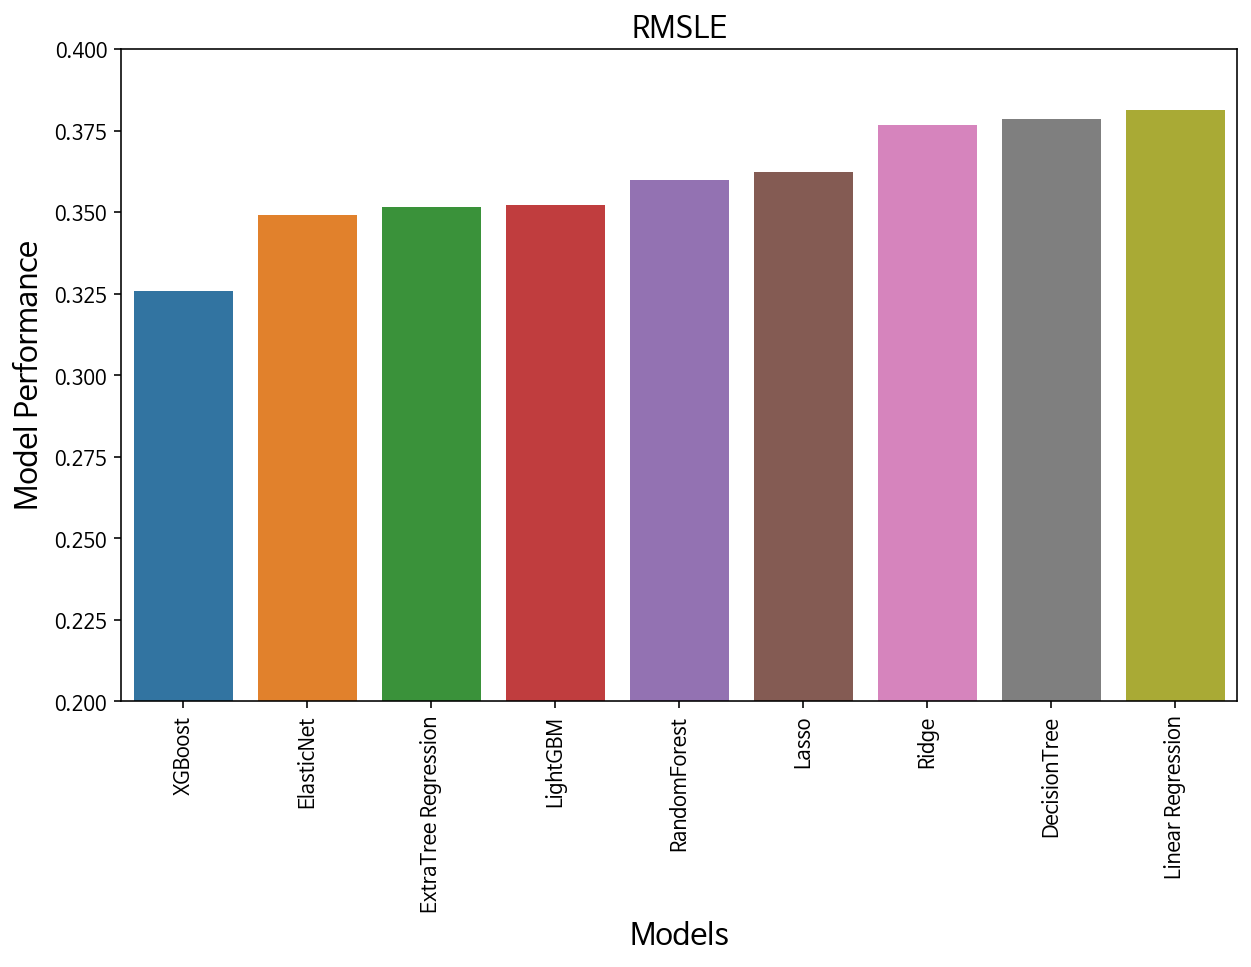

In [90]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.ylim(0.2, 0.4)
plt.title('RMSLE', fontsize=15)
plt.show()